In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.c_country import C_Country
from utils.graph_generator import get_path

from utils.dotdict import dotdict
from utils.params import init_graph, get_centrum
from utils.params import GIRG_args1,GIRG_args2,GIRG_args3,GIRG_args4, get_moving


import seaborn as sn
import matplotlib.pyplot as plt
sn.set_theme(style="whitegrid")

import os
import pickle


In [2]:
args = {
    "--p_moving": 0.015, 
    "--p_worker": 1.0, 
    "--beta": 0.5,
    "--beta_super":0.0, 
    "--seed": 0,
    "--sigma": 1.0, 
    "--gamma": 0.2,
    "--max_sim": 500,
    "inf_agent_num":1000,
}

In [3]:
import pandas as pd
    
def save_to_file(betas, agg1, agg2, seed, filename):
    df = pd.DataFrame()
    for beta,sims in zip(betas,agg1):
        row = {"sim"+str(i):v for i,v in enumerate(sims)}
        row["beta"]=beta
        row["cen"]=True
        df = df.append(row, ignore_index=True)
    for beta,sims in zip(betas,agg2):
        row = {"sim"+str(i):v for i,v in enumerate(sims)}
        row["beta"]=beta
        row["cen"]=False
        df=df.append(row, ignore_index=True)
    df.to_csv(filename)

In [4]:
def print_pm():
    for seed in range(0,2):
        for config in [True, False]:
            print("Config" if config else "GIRG")
            for GIRG_args in [GIRG_args1 ,GIRG_args2, GIRG_args3, GIRG_args4]:
                GIRG_args["config_model"]=config
                GIRG_args["random_seed"]=seed
                graph = init_graph(GIRG_args)
                hun = C_Country(graph)

                pm = get_moving(graph, procent = 0.001)
                print(pm)
#print_pm()

# GIRG

In [5]:
"""
betas = np.concatenate(
    (np.linspace(args["--gamma"], 1.3*args["--gamma"], 12),
     np.linspace(1.3*args["--gamma"], 2.0*args["--gamma"], 15)[1:])
)
"""
betas = np.linspace(args["--gamma"], 2.0*args["--gamma"], 4)[1:]

In [6]:
betas

array([0.26666667, 0.33333333, 0.4       ])

In [7]:
args["procnum"] = 4
args["simnum"] = 3

inf_city = 30

In [8]:
%time

log_folder = "data/girgs_final"
if(not os.path.exists(log_folder)):
    os.makedirs(log_folder)

for seed in range(0, 1):
    for config in [False]:
    #for config in [True, False]:
        #for GIRG_args in [GIRG_args1 ,GIRG_args2, GIRG_args3, GIRG_args4]:
        for GIRG_args in [GIRG_args1]:
            GIRG_args["config_model"]=config
            GIRG_args["random_seed"]=seed
            graph = init_graph(GIRG_args)
            hun = C_Country(graph)

            pm = get_moving(graph, procent = 0.001)
            args["--p_moving"]=pm

            centrum = get_centrum(graph, "k-core", inf_city)
            agg1 = hun.run_for_betas_simple_raw(args, centrum, betas, inf_city, "uniform_random", inf_curve=True)
            args["--beta_type"]=1
            agg2 = hun.run_for_betas_simple_raw(args, centrum, betas, inf_city, "uniform_random", inf_curve=True)
            args["--beta_type"]=2
            agg3 = hun.run_for_betas_simple_raw(args, centrum, betas, inf_city, "uniform_random", inf_curve=True)
            #periphery = [n for n in graph.nodes() if n not in centrum] 
            #agg2 = hun.run_for_betas_simple_raw(args, periphery, betas, inf_city, "uniform_random", inf_curve=True)
            
            """
            graph_name = "Config" if config else "GIRG"
            tau = GIRG_args["tau"]
            alpha = GIRG_args["alpha"]
            filename = "{}/{}_tau:{}_alpha:{}_seed:{}.csv".format(
                log_folder, graph_name, tau, alpha,seed)
            
            save_to_file(betas, agg1, agg2, seed, filename)
            """

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 4.53 µs
 9/9

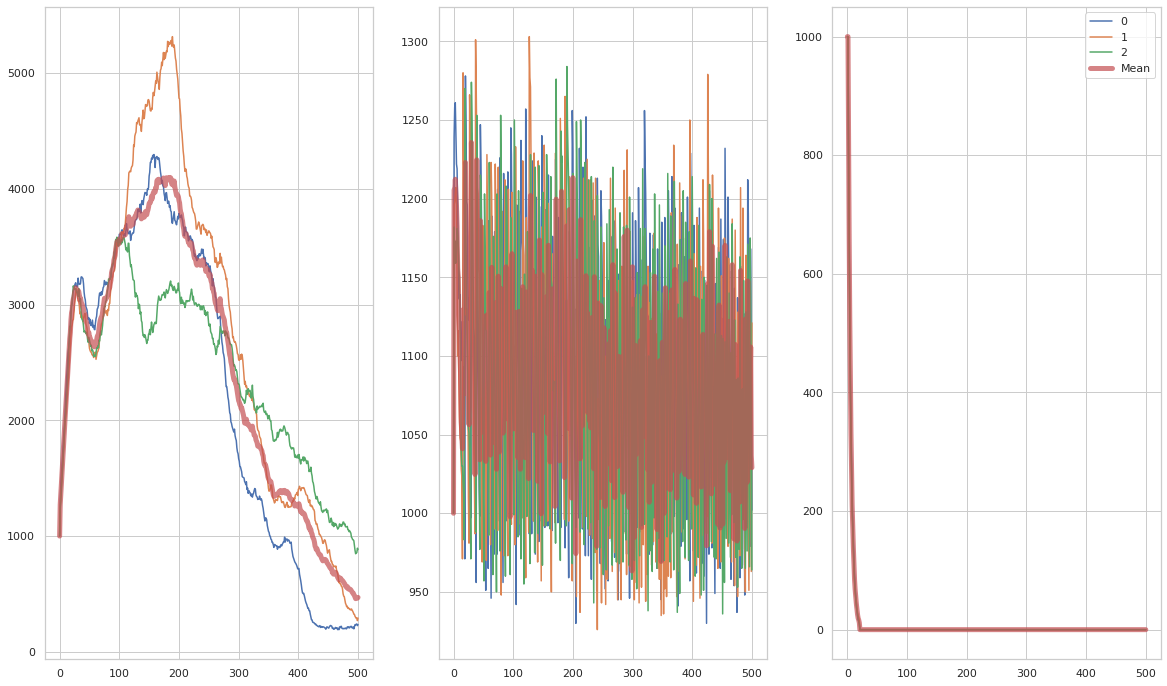

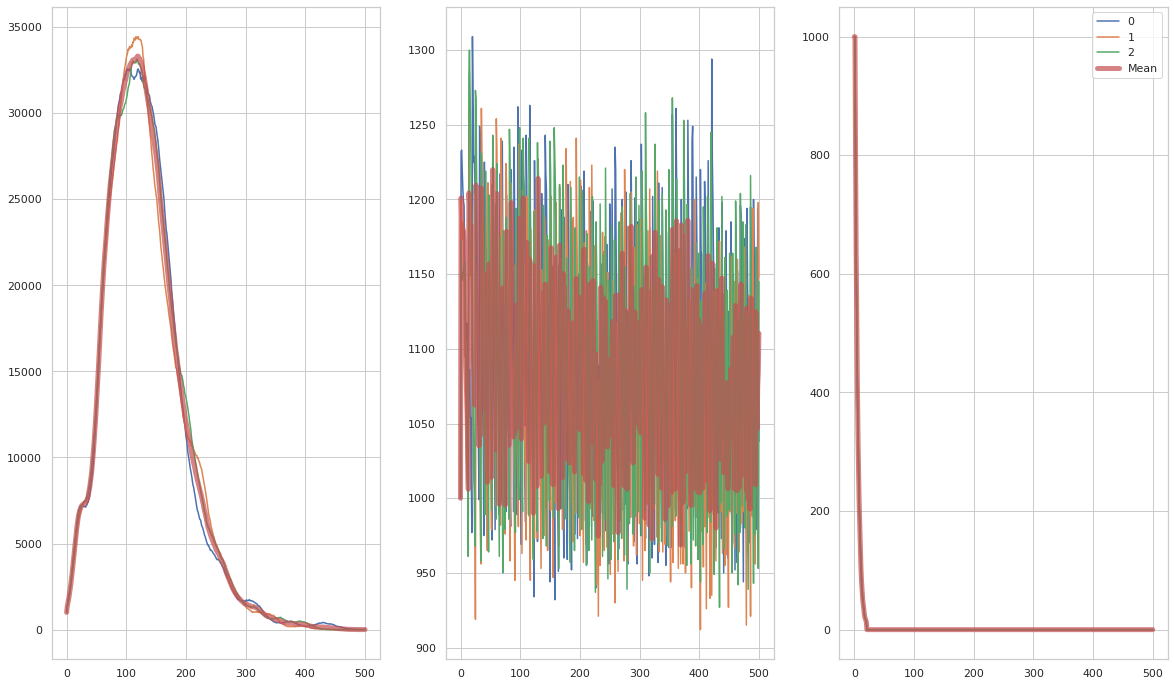

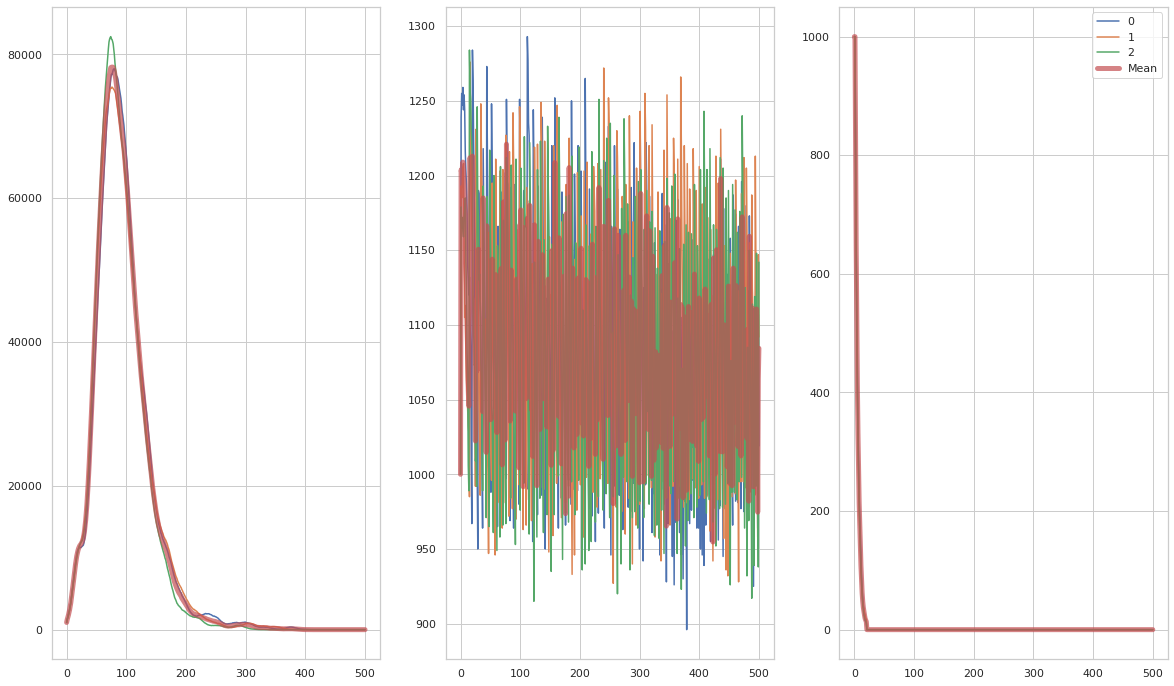

In [9]:
for i in range(3):
    fig,axs = plt.subplots(1,3, figsize=(20,12))
    for sim in range(agg1[betas[i]].shape[0]):
        axs[0].plot(agg1[betas[i]][sim, :], label=str(sim))
        axs[1].plot(agg2[betas[i]][sim, :], label=str(sim))
        axs[2].plot(agg3[betas[i]][sim, :], label=str(sim))
        
    
    axs[0].plot(np.mean(agg1[betas[i]], axis=0), label="Mean", linewidth=5, alpha=0.7)
    axs[1].plot(np.mean(agg2[betas[i]], axis=0), label="Mean", linewidth=5, alpha=0.7)
    axs[2].plot(np.mean(agg3[betas[i]], axis=0), label="Mean", linewidth=5, alpha=0.7)

    plt.legend()
    plt.show()

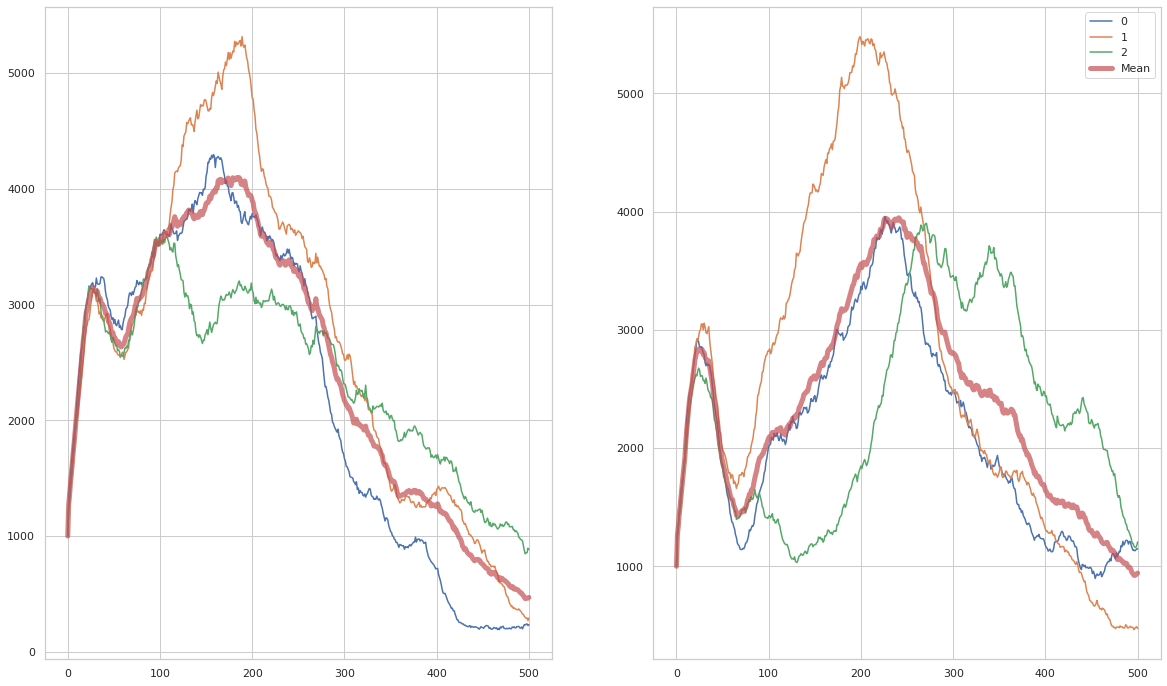

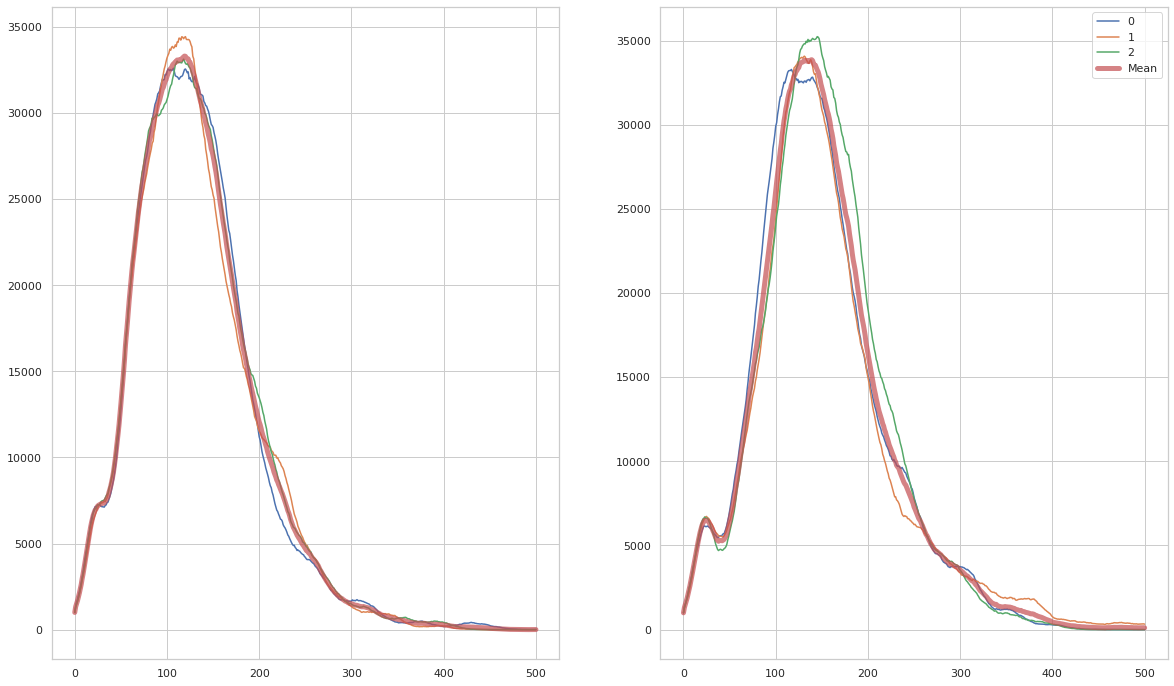

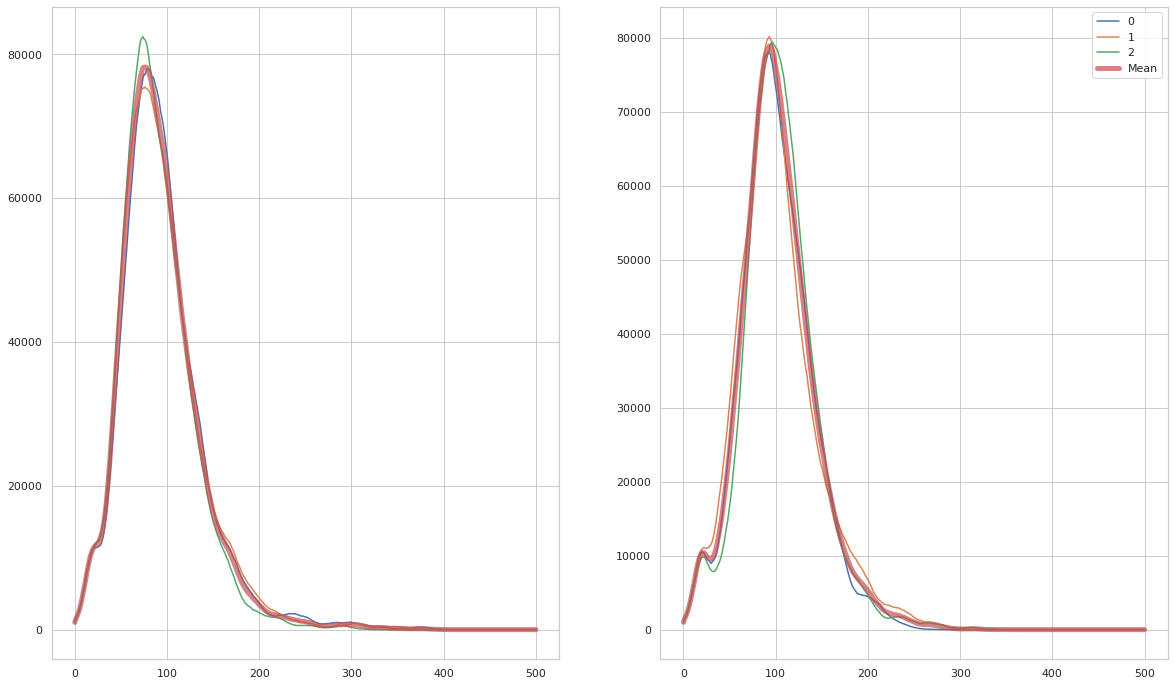

In [19]:
for i in range(3):
    fig,axs = plt.subplots(1,2, figsize=(20,12))
    for sim in range(agg1[betas[i]].shape[0]):
        axs[0].plot(agg1[betas[i]][sim, :], label=str(sim))
        axs[1].plot(agg2[betas[i]][sim, :], label=str(sim))
        
    
    axs[0].plot(np.mean(agg1[betas[i]], axis=0), label="Mean", linewidth=5, alpha=0.7)
    axs[1].plot(np.mean(agg2[betas[i]], axis=0), label="Mean", linewidth=5, alpha=0.7)

    plt.legend()
    plt.show()

In [ ]:
for files in [["GIRG_tau:2.5_alpha:2.3","GIRG_tau:3_alpha:1.3",
                 "GIRG_tau:3.5_alpha:1.3","GIRG_tau:3.5_alpha:2.3"],
              ["Config_tau:2.5_alpha:2.3","Config_tau:3_alpha:1.3",
                  "Config_tau:3.5_alpha:1.3","Config_tau:3.5_alpha:2.3"]]:
    #plt.figure(figsize=(10,8))
    fig,axs = plt.subfigures(1,2, figsize=(20,12))
    for file in files:
        df = pd.read_csv("girgs_final/{}_seed:{}.csv".format(file, 0))
        for seed in range(0,25):
            df_temp = pd.read_csv("girgs_final/{}_seed:{}.csv".format(file, seed))
            df = pd.merge(df,df_temp, how='inner', left_on=['beta','cen'], right_on=['beta','cen'])

        df["mean"] = df.drop(['beta', 'cen'], axis=1).mean(1)
        df["std"] = df.drop(['beta', 'cen'], axis=1).std(1)
        
        
        df_cen = df[df["cen"]==True].drop(['beta', 'cen'], axis=1).mean(1)
        df_per = df[df["cen"]==False].drop(['beta', 'cen'], axis=1).mean(1)
        betas = df[df["cen"]==True]["beta"]
        
        axs[0].plot(betas, df_cen, label=file)
        axs[1].plot(betas, df_per, label=file)
        #axs[0].plot(betas/args["--gamma"], df_agg["ratio"].values, label=file)
        #plt.fill_between(betas/args["--gamma"], df_agg["lower"].values, df_agg["upper"].values,
        #                 alpha=0.2)
    plt.xlabel("R_0")
    plt.legend()
    plt.show()

In [14]:
def save_file(df, file):
    df_cen = df[df["cen"]==True].drop(['beta', 'cen'], axis=1).mean(1)
    df_per = df[df["cen"]==False].drop(['beta', 'cen'], axis=1).mean(1)
    betas = df[df["cen"]==True]["beta"]

    df_agg = pd.DataFrame()
    df_agg["betas"]=df[df["cen"]==True]["beta"]
    df_agg["mean1"]=df_cen
    df_agg["std1"]=df[df["cen"]==True].drop(['beta', 'cen'], axis=1).std(1)
    df_agg["mean2"]=np.array(df_per)
    df_agg["std2"]=np.array(df[df["cen"]==False].drop(['beta', 'cen'], axis=1).std(1))
    df_agg["ratio"]=df_agg["mean1"]/df_agg["mean2"]
    A = 1.645/np.sqrt(df.drop(['beta', 'cen'], axis=1).shape[1])
    df_agg["conf1_lower"] = df_agg["mean1"]-df_agg["std1"]*A
    df_agg["conf1_upper"] = df_agg["mean1"]+df_agg["std1"]*A
    df_agg["conf2_lower"] = df_agg["mean2"]-df_agg["std2"]*A
    df_agg["conf2_upper"] = df_agg["mean2"]+df_agg["std2"]*A
    df_agg["lower"] = df_agg["conf1_lower"]/df_agg["conf2_upper"]
    df_agg["upper"] = df_agg["conf1_upper"]/df_agg["conf2_lower"]

    df_agg.to_csv("girgs_final/aggregation/"+file+"_agg.csv")
    
    return df_agg

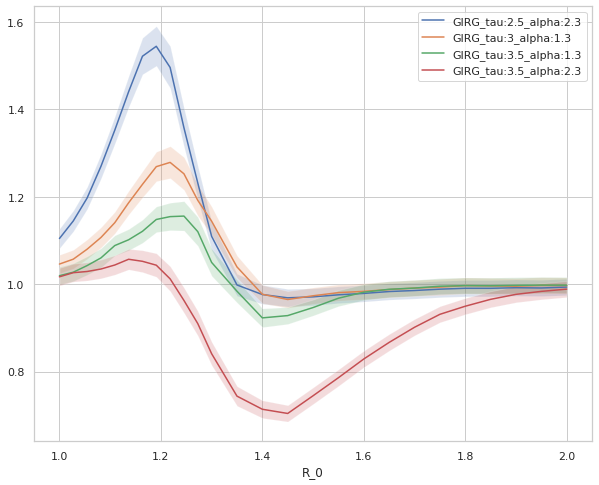

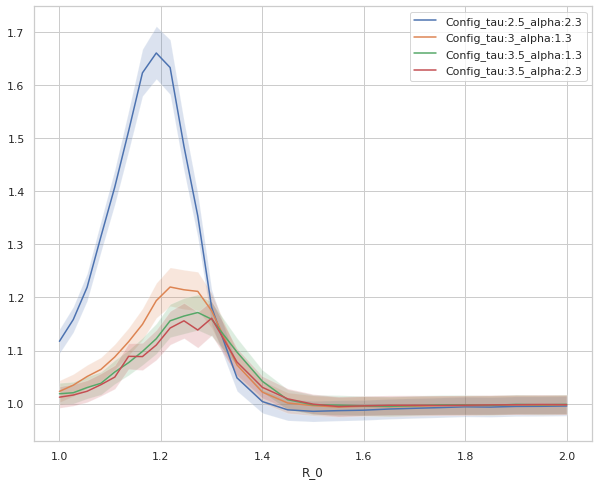

In [15]:
for files in [["GIRG_tau:2.5_alpha:2.3","GIRG_tau:3_alpha:1.3",
                 "GIRG_tau:3.5_alpha:1.3","GIRG_tau:3.5_alpha:2.3"],
              ["Config_tau:2.5_alpha:2.3","Config_tau:3_alpha:1.3",
                  "Config_tau:3.5_alpha:1.3","Config_tau:3.5_alpha:2.3"]]:
    plt.figure(figsize=(10,8))
    for file in files:
        df = pd.read_csv("girgs_final/{}_seed:{}.csv".format(file, 0))
        for seed in range(0,25):
            df_temp = pd.read_csv("girgs_final/{}_seed:{}.csv".format(file, seed))
            df = pd.merge(df,df_temp, how='inner', left_on=['beta','cen'], right_on=['beta','cen'])

        df["mean"] = df.drop(['beta', 'cen'], axis=1).mean(1)
        df["std"] = df.drop(['beta', 'cen'], axis=1).std(1)

        df.to_csv("girgs_final/aggregation/"+file+"_all.csv")
        df_agg = save_file(df, file)

        plt.plot(betas/args["--gamma"], df_agg["ratio"].values, label=file)
        plt.fill_between(betas/args["--gamma"], df_agg["lower"].values, df_agg["upper"].values,
                         alpha=0.2)
    plt.xlabel("R_0")
    plt.legend()
    plt.show()